In [1]:
import os
import sys
from IPython.core import ultratb
import torch

torch.set_num_threads(1)
torch.set_num_interop_threads(1)
import matplotlib.pyplot as plt
from workspace import Workspace as W
import numpy as np

from utils import print_metrics, init_if_not_saved, move_to_gpu
import hydra
import pickle as pkl


/private/home/dishank/project/metric-learning/LODLs/venv/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [49]:
fname = "/private/home/dishank/project/metric-learning/LODLs/exp/local/2023.04.05/1535" + "/best.pkl"
# fname = "/private/home/dishank/project/metric-learning/LODLs/exp/local/2023.04.05/0743" + "/best.pkl"
# if os.path.exists(fname):
#     print(f"Resuming fom {fname}")
with open(fname, "rb") as f:
    workspace = pkl.load(f)

move_to_gpu(workspace.problem)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
workspace.model = workspace.model.to(device)

In [50]:
workspace.test()


Benchmarking Model...
Final train DQ: 1.94e-02, Loss: -1.94e-02, MAE: 0.00, MSE: 3.40e-04
Final val DQ: 4.71e-03, Loss: -4.71e-03, MAE: 0.00, MSE: 4.37e-04
Final test DQ: 4.20e-03, Loss: 0.00e+00, MAE: 0.01, MSE: 4.37e-04

Random Decision Quality: -0.01 (normalized: 0)
Optimal Decision Quality: 0.04 (normalized: 1)

Normalized Train Decision Quality: 0.65
Normalized Val Decision Quality: 0.34
Normalized Test Decision Quality: 0.33
writing to test_stats.json


In [51]:
workspace.train_iter

330

In [52]:
X_train, Y_train, Y_train_aux = workspace.problem.get_train_data()
X_val, Y_val, Y_val_aux = workspace.problem.get_val_data()
X_test, Y_test, Y_test_aux = workspace.problem.get_test_data()

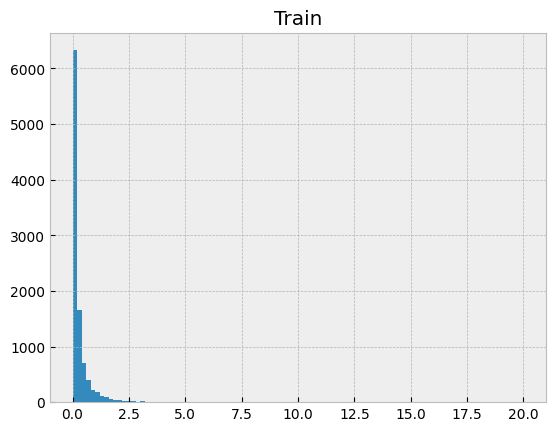

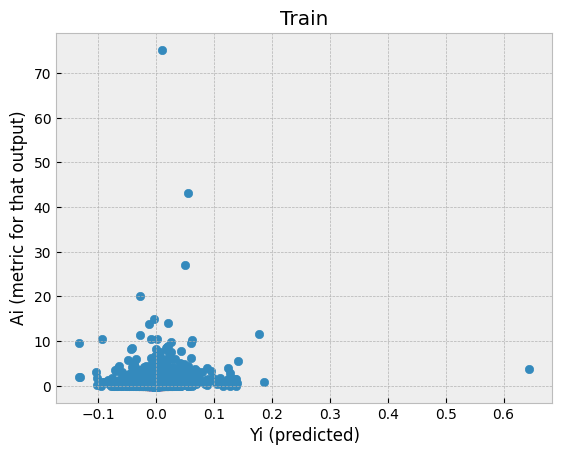

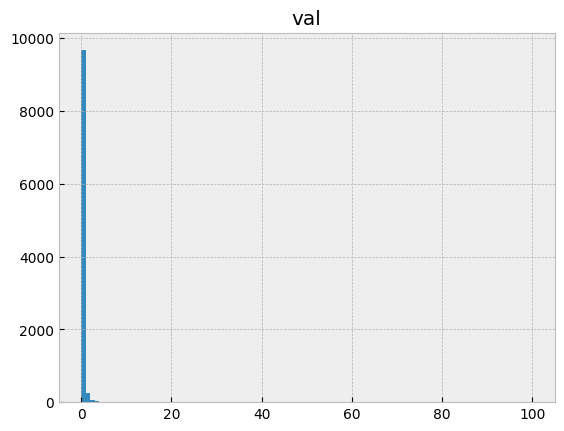

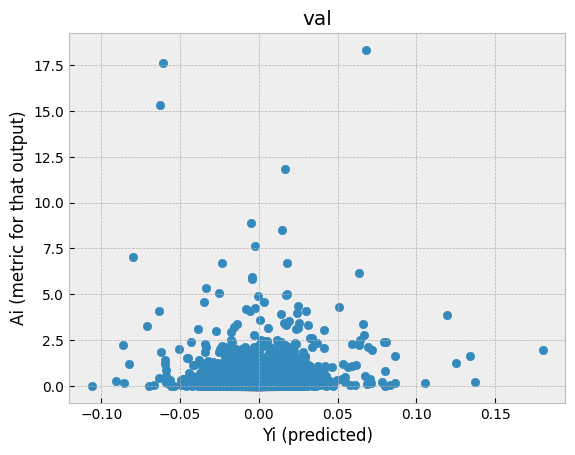

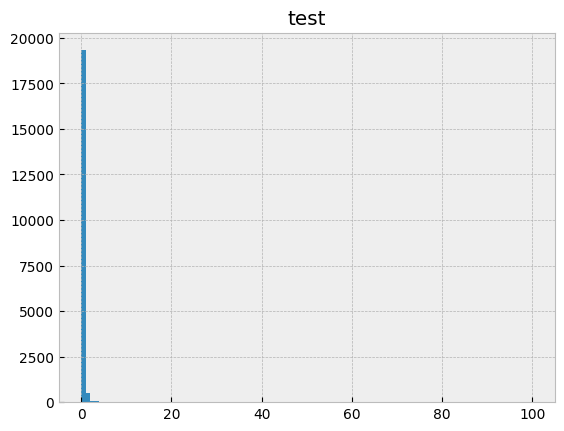

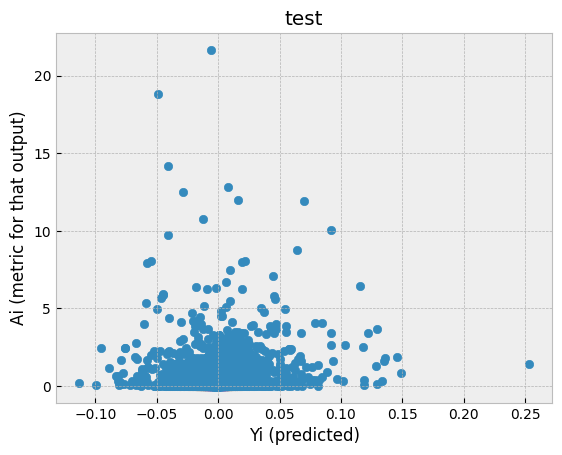

In [53]:
Ai_train= []
Yi_train = []

for i in range(len(X_train)):
    Ai_train.append(workspace.model.metric_forward(X_train[i]).squeeze().detach().cpu().numpy())
    Yi_train.append(workspace.model(X_train[i]).squeeze().detach().cpu().numpy())
    # Yi_train.append(Y_train[i].cpu().numpy())

Ai_train = np.array(Ai_train).flatten()
Yi_train = np.array(Yi_train).flatten()

Ai_val= []
Yi_val = []

for i in range(len(X_val)):
    Ai_val.append(workspace.model.metric_forward(X_val[i]).squeeze().detach().cpu().numpy())
    Yi_val.append(workspace.model(X_val[i]).squeeze().detach().cpu().numpy())
    # Yi_val.append(Y_val[i].cpu().numpy())

Ai_val = np.array(Ai_val).flatten()
Yi_val = np.array(Yi_val).flatten()

Ai_test= []
Yi_test = []

for i in range(len(X_test)):
    Ai_test.append(workspace.model.metric_forward(X_test[i]).squeeze().detach().cpu().numpy())
    Yi_test.append(workspace.model(X_test[i]).squeeze().detach().cpu().numpy())
    # Yi_test.append(Y_test[i].cpu().numpy())

Ai_test = np.array(Ai_test).flatten()
Yi_test = np.array(Yi_test).flatten()

# plot Ai_train vs Yi_train
fig, ax = plt.subplots()
ax.hist(Ai_train, range=[0,20],bins=100)
ax.set_title("Train")
fig, ax = plt.subplots()
ax.scatter(Yi_train, Ai_train)
ax.set_xlabel("Yi (predicted)")
ax.set_ylabel("Ai (metric for that output)")
ax.set_title("Train")
# ax.set_xlim(0, 0.4)
# ax.set_ylim(0, 200)

fig, ax = plt.subplots()
ax.hist(Ai_val, range=[0,100],bins=100)
ax.set_title("val")
fig, ax = plt.subplots()
ax.scatter(Yi_val, Ai_val)
ax.set_xlabel("Yi (predicted)")
ax.set_ylabel("Ai (metric for that output)")
ax.set_title("val")
# ax.set_xlim(0, 0.4)
# ax.set_ylim(0, 200)

fig, ax = plt.subplots()
ax.hist(Ai_test, range=[0,100],bins=100)
ax.set_title("test")
fig, ax = plt.subplots()
ax.scatter(Yi_test, Ai_test)
ax.set_title("test")
ax.set_xlabel("Yi (predicted)")
ax.set_ylabel("Ai (metric for that output)")
# ax.set_xlim(0, 0.4)
# ax.set_ylim(0, 200)
plt.show()

In [67]:
# print(((Ai>=100)&(Ai<1000000)).sum())
print(((Yi>=1)&(Yi<=1)).sum())

148


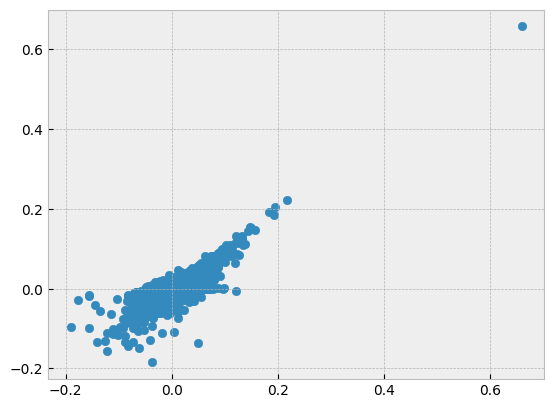

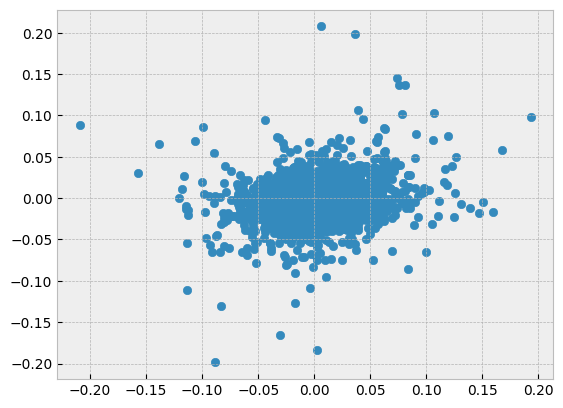

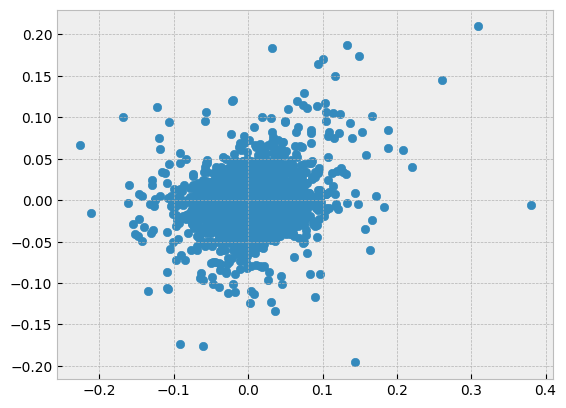

In [28]:
Yi = []
Yi_pred = []
for i in range(len(X_train)):
    Yi_pred.append(workspace.model(X_train[i]).squeeze().detach().cpu().numpy())
    Yi.append(Y_train[i].cpu().numpy())
Yi = np.array(Yi).flatten()
Yi_pred = np.array(Yi_pred).flatten()

# plot Ai vs Yi
fig, ax = plt.subplots()
# ax.hist(Yi, bins=100)
ax.scatter(Yi, Yi_pred)

Yi = []
Yi_pred = []
for i in range(len(X_val)):
    Yi_pred.append(workspace.model(X_val[i]).squeeze().detach().cpu().numpy())
    Yi.append(Y_val[i].cpu().numpy())
Yi = np.array(Yi).flatten()
Yi_pred = np.array(Yi_pred).flatten()


# plot Ai vs Yi
fig, ax = plt.subplots()
# ax.hist(Yi, bins=100)
ax.scatter(Yi, Yi_pred)

Yi = []
Yi_pred = []
for i in range(len(X_test)):
    Yi_pred.append(workspace.model(X_test[i]).squeeze().detach().cpu().numpy())
    Yi.append(Y_test[i].cpu().numpy())
Yi = np.array(Yi).flatten()
Yi_pred = np.array(Yi_pred).flatten()

# plot Ai vs Yi
fig, ax = plt.subplots()
# ax.hist(Yi, bins=100)
ax.scatter(Yi, Yi_pred)









plt.show()